In [1]:
library(data.table)
library(dplyr)
library(mice)
library(ggplot2)

set.seed(99)
setwd("/home/luo_wenjin/data/IHA_ML/")

df1 <- fread('pato_raw.csv')
df2 <- fread('conpass_raw.csv')
df3 <- fread('monash_raw.csv')
df4 <- fread('eimds_raw.csv')
df5 <- fread('fos_raw.csv')
df6 <- fread('ukb_raw.csv')

source("00_utils.R")

# Missing rate
missing_rates_df1 <- compute_missing_rate(df1[, c(2:10, 13)])
missing_rates_df2 <- compute_missing_rate(df2[, c(2:10, 13)])
missing_rates_df3 <- compute_missing_rate(df3[, c(2:10, 13)])
missing_rates_df4 <- compute_missing_rate(df4[, c(1:9, 12)])
missing_rates_df5 <- compute_missing_rate(df5[, c(1:9, 12)])
missing_rates_df6 <- compute_missing_rate(df6[, 1:9])

all_missing_rates <- cbind(missing_rates_df1, 
                           missing_rates_df2, 
                           missing_rates_df3,
                           missing_rates_df4, 
                           missing_rates_df5)
colnames(all_missing_rates) <- c('PATO', 'CONPASS', 'MONASH', 'EIMDS', 'FOS')
all_missing_rates$UKB <- "-"
all_missing_rates$UKB[1:9] <- missing_rates_df6$MissingRate
all_missing_rates

# Save missing rate 
fwrite(all_missing_rates,
       '../table_and_figure/missing_rate.csv',
       row.names = TRUE)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




,PATO,CONPASS,MONASH,EIMDS,FOS,UKB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Age,0.00,0.00,0.00,0.00,0.00,0
BMI,0.01,0.01,0.07,0.00,0.00,0.01
WC,0.13,0.15,0.13,0.01,0.01,0
SBP,0.00,0.00,0.06,0.00,0.00,0
DBP,0.00,0.00,0.06,0.00,0.00,0
TG,0.08,0.10,0.23,0.03,0.00,0.05
LDL,0.10,0.11,0.24,0.03,0.02,0.05
FBG,0.10,0.15,0.25,0.03,0.01,0.13
PRC,0.00,0.07,0.11,0.05,0.00,0


In [2]:
#data imputation
set.seed(99)

# Perform multiple imputation using mice
imp1 <- mice(df1[, c(1:10, 13)])
imp2 <- mice(df2[, c(1:10, 13)])
imp3 <- mice(df3[, c(1:10, 13)])
imp4 <- mice(df4[, c(1:9, 12)])
imp5 <- mice(df5[, c(1:9, 12)])
imp6 <- mice(df6[, c(1:9)])

# Replace original data with imputed data
df1[, c(1:10, 13)] <- complete(imp1)
df2[, c(1:10, 13)] <- complete(imp2)
df3[, c(1:10, 13)] <- complete(imp3)
df4[, c(1:9, 12)] <- complete(imp4)
df5[, c(1:9, 12)] <- complete(imp5)
df6[, c(1:9)] <- complete(imp6)

# Save imputed data
fwrite(df1, 'pato_imp.csv', row.names = FALSE)
fwrite(df2, 'conpass_imp.csv', row.names = FALSE)
fwrite(df3, 'monash_imp.csv', row.names = FALSE)
fwrite(df4, 'eimds_imp.csv', row.names = FALSE)
fwrite(df5, 'fos_imp.csv', row.names = FALSE)
fwrite(df6, 'ukb_imp.csv', row.names = FALSE)


 iter imp variable
  1   1  BMI  WC  TG  LDL  FBG
  1   2  BMI  WC  TG  LDL  FBG
  1   3  BMI  WC  TG  LDL  FBG
  1   4  BMI  WC  TG  LDL  FBG
  1   5  BMI  WC  TG  LDL  FBG
  2   1  BMI  WC  TG  LDL  FBG
  2   2  BMI  WC  TG  LDL  FBG
  2   3  BMI  WC  TG  LDL  FBG
  2   4  BMI  WC  TG  LDL  FBG
  2   5  BMI  WC  TG  LDL  FBG
  3   1  BMI  WC  TG  LDL  FBG
  3   2  BMI  WC  TG  LDL  FBG
  3   3  BMI  WC  TG  LDL  FBG
  3   4  BMI  WC  TG  LDL  FBG
  3   5  BMI  WC  TG  LDL  FBG
  4   1  BMI  WC  TG  LDL  FBG
  4   2  BMI  WC  TG  LDL  FBG
  4   3  BMI  WC  TG  LDL  FBG
  4   4  BMI  WC  TG  LDL  FBG
  4   5  BMI  WC  TG  LDL  FBG
  5   1  BMI  WC  TG  LDL  FBG
  5   2  BMI  WC  TG  LDL  FBG
  5   3  BMI  WC  TG  LDL  FBG
  5   4  BMI  WC  TG  LDL  FBG
  5   5  BMI  WC  TG  LDL  FBG

 iter imp variable
  1   1  BMI  WC  TG  LDL  FBG  PRC  PAC
  1   2  BMI  WC  TG  LDL  FBG  PRC  PAC
  1   3  BMI  WC  TG  LDL  FBG  PRC  PAC
  1   4  BMI  WC  TG  LDL  FBG  PRC  PAC
  1   5  BMI  WC  TG 

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 207 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 136 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 171 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 168 rows containing non-finite outside the scale range (`stat_density()`).”


png 
  2

Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 258 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 176 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 184 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 259 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 120 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 24 rows containing non-finite outside the scale range (`stat_density()`).”


png 
  2

Warning message:
“Removed 40 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 72 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 35 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 35 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 126 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 132 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 135 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 58 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 56 rows containing non-finite outside the scale range (`stat_density()`).”


png 
  2

Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 38 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 38 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 42 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 59 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 59 rows containing non-finite outside the scale range (`stat_density()`).”


png 
  2

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 14 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 32 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 21 rows containing non-finite outside the scale range (`stat_density()`).”


png 
  2

Warning message:
“Removed 133 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 74 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 27 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 27 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 1051 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 1079 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 2725 rows containing non-finite outside the scale range (`stat_density()`).”


png 
  2

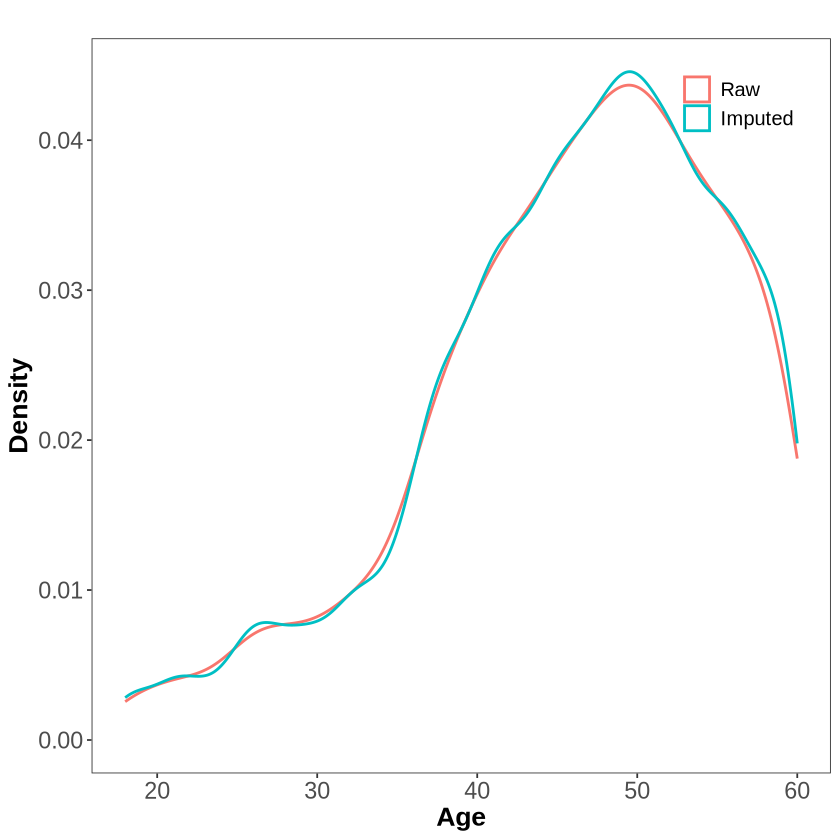

In [3]:
# Example of density plot
plot_density(imp1, df1[, 2])

# Save density plots of raw and imputed data
pdf(file = "../table_and_figure/pato_imp_densityplot2.pdf")
plot_density(imp1, df1[, c(1:10, 13)])
dev.off()

pdf(file = "../table_and_figure/conpass_imp_densityplot2.pdf")
plot_density(imp2, df2[, c(1:10, 13)])
dev.off()

pdf(file = "../table_and_figure/monash_imp_densityplot2.pdf")
plot_density(imp3, df3[, c(1:10, 13)])
dev.off()

pdf(file = "../table_and_figure/cqu_imp_densityplot2.pdf")
plot_density(imp4, df4[, c(1:9, 12)])
dev.off()

pdf(file = "../table_and_figure/fhs_imp_densityplot2.pdf")
plot_density(imp5, df5[, c(1:9, 12)])
dev.off()

pdf(file = "../table_and_figure/ukb_imp_densityplot2.pdf")
plot_density(imp6, df6[, c(1:9)])
dev.off()

In [4]:
# Data normalization
file1 <- list.files(pattern = "*imp.csv")[1:3]
file2 <- list.files(pattern = "*imp.csv")[4:6]

# Apply transformation to files in file1
lapply(file1, FUN = function(x) {
  dt1 <- fread(x) %>% trans1()
  file_name <- paste0(substring(x, 1, (nchar(x) - 7)), "transform.csv")
  fwrite(dt1, file_name, row.names = FALSE)
})

# Apply transformation to files in file2
lapply(file2, FUN = function(x) {
  dt1 <- fread(x) %>% trans2()
  file_name <- paste0(substring(x, 1, (nchar(x) - 7)), "transform.csv")
  fwrite(dt1, file_name, row.names = FALSE)
})

[[1]]
[1] "conpass_transform.csv"

[[2]]
[1] "eimds_transform.csv"

[[3]]
[1] "fos_transform.csv"

Warning message in log(dt1$PRC):
“NaNs produced”


[[1]]
[1] "monash_transform.csv"

[[2]]
[1] "pato_transform.csv"

[[3]]
[1] "ukb_transform.csv"